In [1]:
from numpy import *


## 9.1 NumPy 工具包



NumPy 的主要对象是同种元素的多维数组，其中所有元素都是一种类型的元素表格，通过一个正整数下表索引。

区分 `array.array` 与 `numpy.array`，后者类型为 ndarray，属性有：
- `ndim`：数组轴的个数，秩
- `shape`：数组的维度及各维度大小，一个元组
- `size`：数组中元素总个数
- `dtype`：数组中元素类型
- `itemsize`：数组中每个元素的字节大小

In [2]:
a = arange(15).reshape(3, 5)
print(a, '\n')
print(a.shape, '\n')
print(a.ndim, '\n')
print(a.dtype.name, '\n')
print(a.itemsize, '\n')
print(a.size)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]] 

(3, 5) 

2 

int32 

4 

15



### 9.1.1 创建数组

可以通过 `array` 函数创建一个数组，创建数组的类型与原 array 数组一致

可任意利用 `dtype` 参数显示指定创建数组的类型

NumPy 提供了 `zeros`、`ones`、`empty` 等函数，分别用于创建全0、全1、随机内容数组，默认创建类型为float64

NumPy 提供了 `arange` 函数，返回按一定规律排列的数组

In [3]:
a = array([2, 3, 4])
print(a)
print(a.dtype, '\n')

b = array([1.2, 3.5, 5.1])
print(b)
print(b.dtype, '\n')

c = array([[1, 2], [3, 4]], dtype=complex)
print(c)
print(c.dtype, '\n')

print(zeros((3, 4)), '\n')

print(ones((2, 3, 4), dtype=int16), '\n')

print(empty((2, 3)), '\n')

print(arange(10, 30, 5))
print(arange(0, 2, 0.3))

[2 3 4]
int32 

[1.2 3.5 5.1]
float64 

[[1.+0.j 2.+0.j]
 [3.+0.j 4.+0.j]]
complex128 

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]] 

[[[1 1 1 1]
  [1 1 1 1]
  [1 1 1 1]]

 [[1 1 1 1]
  [1 1 1 1]
  [1 1 1 1]]] 

[[1.39069238e-309 1.39069238e-309 1.39069238e-309]
 [1.39069238e-309 1.39069238e-309 1.39069238e-309]] 

[10 15 20 25]
[0.  0.3 0.6 0.9 1.2 1.5 1.8]



### 9.1.2 打印数组

打印一个数组时，NumPy 的展示形式类似于嵌套列表，但呈现如下布局：
1. 从左到右打印最后的轴
2. 从顶到下打印次后的轴
3. 从顶到下打印剩下的轴，每个切片通过一个空行与下一个切片隔开
4. 一维数组以行的形式打印出来，二维数组以矩阵的形式打印出来，三维数组以矩阵列表的形式打印出来

如果一个数组过大，打印会自动省略中间的部分，仅打印角落 


In [4]:
a = arange(6)
print(a, '\n')

b = arange(12).reshape(4, 3)
print(b, '\n')

# c=arange(24).reshape(2,3,4)
c = arange(24).reshape((2, 3, 4))
print(c, '\n')

print(arange(10000), '\n')

print(arange(10000).reshape(100, 100))

[0 1 2 3 4 5] 

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]] 

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]] 

[   0    1    2 ... 9997 9998 9999] 

[[   0    1    2 ...   97   98   99]
 [ 100  101  102 ...  197  198  199]
 [ 200  201  202 ...  297  298  299]
 ...
 [9700 9701 9702 ... 9797 9798 9799]
 [9800 9801 9802 ... 9897 9898 9899]
 [9900 9901 9902 ... 9997 9998 9999]]



### 9.1.3 基本运算

数组按元素进行算术运算

In [5]:
a = array([20, 30, 40, 50])
b = arange(4)
print(a, '\n')
print(b)
print('------------')
c = a-b
print(c, '\n')

print(b**2, '\n')

print(10*sin(a), '\n')

print(a < 35)

[20 30 40 50] 

[0 1 2 3]
------------
[20 29 38 47] 

[0 1 4 9] 

[ 9.12945251 -9.88031624  7.4511316  -2.62374854] 

[ True  True False False]



NumPy 中 * 是对应元素相乘，矩阵乘法需要使用函数 `dot` 完成。


In [6]:
A = array([[1, 1], [0, 1]])
B = array([[2, 0], [3, 4]])
print(A*B, '\n')
print(dot(A, B))

[[2 0]
 [0 4]] 

[[5 4]
 [3 4]]



+= 、 -= 等运算符依旧适用，在运算过程中注意类型转换问题

In [7]:
a = ones((2, 3), dtype=int)
b = random.random((2, 3))
print(a, '\n')
print(b)
print('------------')
a *= 3
print(a, '\n')

b += a
print(b, '\n')

# a+=b
# print(a,'\n')

[[1 1 1]
 [1 1 1]] 

[[0.44029985 0.87397148 0.53954834]
 [0.86700608 0.62072429 0.72682931]]
------------
[[3 3 3]
 [3 3 3]] 

[[3.44029985 3.87397148 3.53954834]
 [3.86700608 3.62072429 3.72682931]] 




多种类型的数组进行计算时，结果往往会采用更精确的值，这一行为称为 upcast。

In [8]:
a = ones(3, dtype=int32)
b = linspace(0, pi, 3)
print(b.dtype.name, '\n')

c = a+b
print(c)

float64 

[1.         2.57079633 4.14159265]



### 9.1.4 索引、切片和迭代

索引获取指定位置元素的值

切片抽取数组部分元素形成新数组

迭代按需求提取数组中部分元素形成新数组

In [9]:
a = arange(10)**3
print(a)
print('------------')
print(a[2], '\n')
print(a[2:5], '\n')

a[:6:2] = -1000
print(a, '\n')

print(a[::-1])  # reversedata

[  0   1   8  27  64 125 216 343 512 729]
------------
8 

[ 8 27 64] 

[-1000     1 -1000    27 -1000   125   216   343   512   729] 

[  729   512   343   216   125 -1000    27 -1000     1 -1000]



对于多维数组，可以为每个轴设置一个索引，每个索引用逗号分隔

当提供的轴个数少于索引个数时，默认代表缺失部分索引的整个切片

当对数组中每个元素进行运算时，可以使用数组的 `flat` 属性，作为数组中便利每个元素的迭代器

`fromfunction` 函数：将索引作为参数根据函数结果创建数组

In [10]:
def f(x, y):
    return 10*x+y


b = fromfunction(f, (5, 4), dtype=int)
print(b)
print('------------')
print(b[2, 3], '\n')
print(b[0:5, 1], '\n')
print(b[:, 1], '\n')
print(b[1:3, :], '\n')

print(b[-1], '\n')  # b[-1,:]

for element in b.flat:
    print(element, end=' ')

[[ 0  1  2  3]
 [10 11 12 13]
 [20 21 22 23]
 [30 31 32 33]
 [40 41 42 43]]
------------
23 

[ 1 11 21 31 41] 

[ 1 11 21 31 41] 

[[10 11 12 13]
 [20 21 22 23]] 

[40 41 42 43] 

0 1 2 3 10 11 12 13 20 21 22 23 30 31 32 33 40 41 42 43 


### 9.1.5 形状操作

`ravel` 方法可以扁平化数组，更推荐使用 `flatten` 方法

`transpose` 方法对二维数组（矩阵）来说是转置，可以添加参数，指明转换的轴

可以通过直接修改数组 `shape` 属性修改数组形状，也可以使用 `resize` 方法，其对数组本身操作，`reshape` 返回新的数组

In [11]:
a = floor(10*random.random((3, 4)))
print(a)
print('------------')
print(a.shape, '\n')
print(a.ravel(), '\n')

a.shape = (6, 2)
print(a.transpose(), '\n')
print(a, '\n')

a.resize((2, 6))
print(a)

[[5. 7. 3. 5.]
 [7. 0. 4. 5.]
 [8. 4. 1. 9.]]
------------
(3, 4) 

[5. 7. 3. 5. 7. 0. 4. 5. 8. 4. 1. 9.] 

[[5. 3. 7. 4. 8. 1.]
 [7. 5. 0. 5. 4. 9.]] 

[[5. 7.]
 [3. 5.]
 [7. 0.]
 [4. 5.]
 [8. 4.]
 [1. 9.]] 

[[5. 7. 3. 5. 7. 0.]
 [4. 5. 8. 4. 1. 9.]]



### 9.1.6 复制和视图

#### 1. 完全不复制

简单对数组进行赋值，a 与 b 指向同一个对象，一个变了另一个也会变

In [12]:
a = arange(12)
b = a
print(b is a, '\n')
b.shape = 3, 4
print(a.shape)

True 

(3, 4)



#### 2. 视图和浅复制

使用 `view` 方法，不同数组对象分享一组数据，形状可以不一致，但数据一致

In [13]:
c = a.view()
print(c is a, '\n')
print(c.base is a, '\n')

c.shape = 2, 6
print(a.shape, '\n')

c[0, 4] = 1234
print(a, '\n')
print(c)

False 

True 

(3, 4) 

[[   0    1    2    3]
 [1234    5    6    7]
 [   8    9   10   11]] 

[[   0    1    2    3 1234    5]
 [   6    7    8    9   10   11]]



#### 3. 深复制

使用 `copy` 方法，完全复制数组及数据

In [14]:
d = a.copy()
print(d is a, '\n')
print(d.base is a, '\n')
d[0, 0] = 9999
print(a)

False 

False 

[[   0    1    2    3]
 [1234    5    6    7]
 [   8    9   10   11]]



### 9.1.7 Numpy 实用技巧


#### 1. “自动”改变形状

可以通过省略多维数组的一个尺寸更改数组的维度，省略的为多将自动计算推导

In [15]:
a = arange(30)
a.shape = 2, -1, 3
print(a.shape, '\n')
print(a, '\n')

(2, 5, 3) 

[[[ 0  1  2]
  [ 3  4  5]
  [ 6  7  8]
  [ 9 10 11]
  [12 13 14]]

 [[15 16 17]
  [18 19 20]
  [21 22 23]
  [24 25 26]
  [27 28 29]]] 




#### 2. 向量组合

可以通过两个尺寸相同的行向量构造二位数组，可用的函数包括：
- `stack`：沿轴连接一系列数据
- `dstack`：沿深度方向（按第三轴）堆叠数据
- `hstack`：水平（按列）堆叠数据
- `vstack`：垂直（按行）堆叠数据
- `column_stack` 将一维数组作为列堆叠在二维数组中

In [16]:
x = arange(0, 10, 2)
y = arange(5)
print(x, '\n')
print(y)
print('------------')
m = vstack([x, y])
xy = hstack([x, y])
print(m, '\n')
print(xy)

[0 2 4 6 8] 

[0 1 2 3 4]
------------
[[0 2 4 6 8]
 [0 1 2 3 4]] 

[0 2 4 6 8 0 1 2 3 4]



#### 3. 直方图

`numpy.random.normal` 按正态分布生成随机数

`pylab.hist` 函数可以自动生成直方图，而 `numpy.histogram` 函数仅会返回直方图数据和箱式向量，参数包括：
- `bins`：int 给定范围等宽度bin数量（默认为10），序列则是指定每个 bin 的范围
- `range`：默认为 `(a.min(), a.max())`
- `normal`：不推荐使用，等效于 `density` 参数
- `density`：是否归一化

`.5 * (bins[1:] + bins[:-1])` 用于获取箱中点

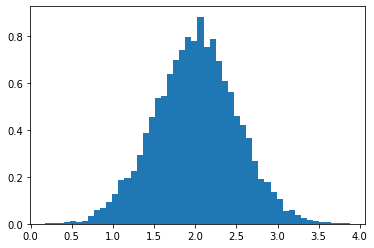

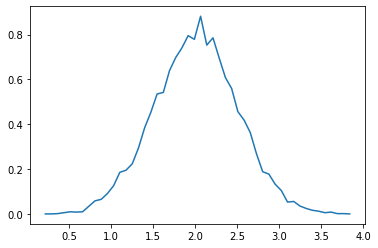

In [17]:
import numpy
import pylab
%matplotlib inline

mu, sigma = 2, 0.5
v = numpy.random.normal(mu, sigma, 10000)
# pylab.hist(v, bins=50, normed=1)
pylab.hist(v, bins=50, density=True)
pylab.show()

# (n, bins) = numpy.histogram(v, bins=50, normed=True)
(n, bins) = numpy.histogram(v, bins=50, density=True)
pylab.plot(.5*(bins[1:]+bins[:-1]), n)
pylab.show()